# Game yang Paling Laku

Toko daring "Ice" yang menjual video game dari seluruh dunia. Data terkait ulasan pengguna dan ahli game, genre, platform (misalnya Xbox atau PlayStation), dan data historis penjualan game tersedia dari sumber terbuka.

Kita perlu mengidentifikasi pola-pola yang menentukan apakah suatu game dapat dikatakan berhasil atau tidak. Dengan begitu, kita bisa menemukan game yang paling berpotensial dan merencanakan kampanye iklannya.


Saat ini tersedia data dari tahun 2016 dan kita sedang merencanakan kampanye untuk tahun 2017.

**KONTEN**

* [Pendahuluan]
* [Tahap 1. Eksplorasi Data]
    * [1.1 Inisialisasi]
    * [1.2 Memuat Data]
    * [1.3 Mempersiapkan Data]
    * [1.4 Kesimpulan dan Langkah-Langkah Selanjutnya]
* [Tahap 2. Pra-pemrosesan Data]   
    * [2.1 Gaya Penulisan Judul]
    * [2.2 Nilai yang Hilang]
    * [2.3 Mengatasi Duplikat]
    * [2.4 Memperbaiki Tipe Data]
    * [2.5 Menghitung Total Penjualan]
    * [2.6 Kesimpulan dan Langkah-Langkah Selanjutnya]
* [Tahap 3. Analisa Data]
    * [3.1 Game per Tahun]
    * [3.2 Distribusi Total Penjualan Berdasarkan Data per Tahun dan Popularitas Game]
    * [3.3 Periode Waktu Pengambilan Data]
    * [3.4 Penjualan yang Berpotensi Memberikan Keuntungan]
    * [3.5 Penjualan Global Game Berdasarkan Platform]
    * [3.6 Korelasi Ulasan dengan Penjualan]
    * [3.7 Distribusi Umum Game Berdasarkan Genre]
    * [3.8 Pemrofilan Pengguna untuk Masing-masing Wilayah]
        * [3.8.1 Platfrom]
        * [3.8.2 Genre]
        * [3.8.3 Rating]  
* [Tahap 4. Menguji Hipotesis Statistik]
    * [4.1 Rata-rata rating pengguna platform Xbox One dan PC adalah sama]
    * [4.2 Rata-rata rating pengguna genre Action dan Sports berbeda]
* [Kesimpulan Umum]

## Pendahuluan 

Dalam proyek kali ini, kita akan mempelajari dan menganalisis data penjualan game di toko daring "Ice" yang menjual video game dari seluruh dunia, untuk mengetahui game yang paling berpotensial dan merencanakan kampanye iklannya untuk tahun depan.

### Tujuan:

Mempelajari penjualan game selama tahun 2016 berdasarkan faktor - faktor pendukungnya untuk mengetahui game yang paling berpotensial memberikan keuntungan di tahun 2017. 

Menguji hipotesis:

1. Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
2. Rata-rata rating pengguna genre Action dan Sports berbeda.

### Tahapan
Kumpulan data terkait ulasan pengguna dan ahli game, genre, platform (misalnya Xbox atau PlayStation), dan data historis penjualan game selama tahun 2016 disimpan dalam *file* berikut: `/datasets/games.csv`.

Pertama, karena tidak ada informasi terkait kualitas data tersebut, kita perlu memeriksanya terlebih dahulu sebelum menguji hipotesis. Kita akan mengevaluasi kualitas data dan melihat apakah masalahnya signifikan. Kemudian, selama pra-pemrosesan data, kita akan mencoba mengatasi masalah yang muncul pada data tersebut, seperti nilai yang hilang, duplikasi, dan sebagainya. Terakhir, kita akan menguji hipotesis dan menarik kesimpulan berdasarkan data yang sudah diproses.
 
Proyek ini akan terdiri dari empat tahap:
 1. Ikhtisar Data
 2. Pra-pemrosesan Data
 3. Analisa Data
 4. Pengujian hipotesis

## Eksplorasi Data 

### Inisialisasi 

In [192]:
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

### Memuat Data 

In [193]:
df = pd.read_csv('/datasets/games.csv')

### Mempersiapkan Data 

**Deskripsi Data**

— Name (nama)

— Platform

— Year_of_Release (tahun rilis)

— Genre

— NA_sales (penjualan di Amerika Utara dalam satuan juta USD)

— EU_sales (penjualan di Eropa dalam satuan juta USD)

— JP_sales (penjualan di Jepang dalam satuan juta USD)

— Other_sales (penjualan di negara lainnya dalam satuan juta USD)

— Critic_Score (skor ulasan dari kritikus, maksimal 100)

— User_Score (skor ulasan dari pengguna, maksimal 10)

— Rating (ESRB)

Data untuk tahun 2016 mungkin tidak lengkap.

In [194]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [196]:
df.shape

(16715, 11)

### Kesimpulan dan Langkah Selanjutnya 

Terdapat 11 kolom dan 16715 dalam dataset yang kita miliki.

Kita dapat melihat masalah pertama dengan gaya penulisan nama kolom, yaitu: beberapa nama ditulis dalam huruf besar, beberapa dalam huruf kecil.

Terdapat pula jumlah nilai yang berbeda antar kolom. Hal ini mengindikasikan adanya nilai yang hilang pada beberapa kolom, seperti:
* `name`
* `year_of_release`
* `genre`
* `critic_score`
* `user_score`
* `rating`

Selain masalah adanya nilai yang hilang, terdapat masalah dengan tipe data beberapa kolom, seperti:
* kolom `year_of_release` memiliki tipe data *float*.
* kolom `user_score` memiliki tipe data *object*.
    

Langkah yang akan kita lakukan pada pra-pemrosesan data:

1. Mengganti nama kolom seluruhnya dengan menggunakan huruf kecil. 

2. Mengisi nilai yang hilang dan memeriksa duplikat. Kita perlu meneliti lebih lanjut, apakah nilai yang hilang pada dataset adalah karena kesalahan *input* data atau karena alasan lain, sehingga kita dapat memutuskan langkah yang tepat untuk mengatasinya. Mungkin saja kita perlu mengisi nilai yang hilang dengan nilai rata - rata atau median dari pengelompokkan data dengan kolom lain, atau data tersebut dapat kita eliminasi karena dinilai tidak berpengaruh terhadap penelitian kita.

3. Tipe data yang bermasalah perlu diganti dengan yang sesuai. 
    * kolom `year_of_release` dengan tipe data *float* perlu diganti menjadi *integer*. Karena tidak terdapat informasi mengenai waktu dan tanggal, kita tidak perlu mengubahnya menjadi *datetime*. Seharusnya informasi mengenai tahun rilis dalam tipe *integer* sudah cukup efisien untuk analisis data.
    * kolom `user_score` dengan tipe data *object* perlu diganti menjadi *float*. Informasi yang berkaitan dengan *score* atau penilaian akan lebih baik menggunakan tipe data *float* supaya nilainya tetap dapat diproses dengan akurat.

## Pra-Pemrosesan Data

Pada tahap sebelumnya, kita sudah melihat bahwa terdapat beberapa masalah pada dataset yang kita miliki. Melalui tahap pra-pemrosesan data, kita akan coba mengatasi masalah - masalah tersebut.

### Gaya Penulisan Judul

In [197]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Kita akan mengubah nama kolom sesuai dengan aturan gaya penulisan yang baik: **Semua karakter harus menggunakan huruf kecil**.

In [198]:
df.columns = df.columns.str.lower()

In [199]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Nama kolom sudah sesuai dengan aturan gaya penulisan yang baik.

### Nilai yang Hilang

Kita memiliki nilai yang hilang dari beberapa kolom pada dataset, yaitu:
* kolom `name`
* kolom `year_of_release`
* kolom `genre`
* kolom `critic_score`
* kolom `user_score`
* kolom `rating`

Kita akan mencoba melihat masing - masing kolom tersebut, dan menentukan bagaimana mengatasi masalah data yang hilang ini.

In [200]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [201]:
df.isna().sum() / len(df) * 100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

**Mengatasi nilai yang hilang pada kolom `name`**

In [202]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Sepertinya nilai yang hilang pada kolom ini simetris dengan kolom lainnya, seperti `genre`, `critic_score`, `user_score` dan `rating`. Mungkin informasi mengenai game ini tidak lengkap. Persentase data ini sangat kecil (sebesar 0.01%), jadi data yang bermasalah ini dapat kita hapus saja.

In [203]:
df=df.drop(df[df['name'].isna()].index)

In [204]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**Mengatasi nilai yang hilang pada kolom `year_of_release`**

In [205]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Untuk mengisi nilai yang hilang pada kolom `year_of_release`, kita akan mencoba melakukan pengelompokkan dengan kolom lain, yaitu `platform` dan mengisinya dengan nilai median. Karena dapat kita asumsikan bahwa game di platform yang sama mungkin saja memiliki tahun rilis yang mungkin sama, meskipun *genre* game tersebut mungkin berbeda - beda.

In [206]:
year_pivot = df.pivot_table(values = 'year_of_release', index = 'platform')
year_pivot

,year_of_release
platform,
2600,1982.137931
3DO,1994.666667
3DS,2013.126953
DC,1999.942308
DS,2008.185290
GB,1995.958763
GBA,2003.210851
GC,2003.400369
GEN,1993.037037


In [207]:
df_wo_nan = df.dropna()
df_wo_nan

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.00,0.00,67.0,tbd,E
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.00,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.00,0.00,48.0,tbd,E


In [208]:
median_year = df_wo_nan.groupby('platform')['year_of_release'].median()
median_year

platform
3DS     2012.0
DC      2000.0
DS      2008.0
GBA     2003.0
GC      2003.0
PC      2009.0
PS      2000.0
PS2     2004.0
PS3     2010.0
PS4     2015.0
PSP     2007.0
PSV     2013.0
Wii     2008.0
WiiU    2013.0
X360    2009.0
XB      2004.0
XOne    2015.0
Name: year_of_release, dtype: float64

In [209]:
median_year_2 = df.groupby('platform')['year_of_release'].median()
median_year_2

platform
2600    1982.0
3DO     1995.0
3DS     2013.0
DC      2000.0
DS      2008.0
GB      1997.0
GBA     2003.0
GC      2003.0
GEN     1993.0
GG      1992.0
N64     1999.0
NES     1986.5
NG      1994.5
PC      2010.0
PCFX    1996.0
PS      1998.0
PS2     2005.0
PS3     2011.0
PS4     2015.0
PSP     2009.0
PSV     2014.0
SAT     1996.0
SCD     1994.0
SNES    1994.0
TG16    1995.0
WS      2000.0
Wii     2009.0
WiiU    2013.0
X360    2010.0
XB      2004.0
XOne    2015.0
Name: year_of_release, dtype: float64

In [210]:
def get_median_year_of_release(row):  
    year_of_release= row['year_of_release']
    platform = row['platform']
    try:
        return median_year[platform]
    except:
        return median_year_2[platform]

In [211]:
df['median_year_of_release'] = df.apply(get_median_year_of_release, axis=1)

In [212]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,2008.0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1986.5
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008.0
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,2008.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1997.0


In [213]:
df['year_of_release'] = df['year_of_release'].fillna(df['median_year_of_release'])

In [214]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,2008.0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1986.5
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008.0
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,2008.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1997.0


In [215]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release


Sekarang, semua nilai NaN di kolom `year_of_release` sudah terisi.

**Mengatasi nilai yang hilang pada kolom `critic_score`, `user_score` dan `rating`**

Kolom `critic_score`, `user_score`, dan `rating` memiliki banyak sekali nilai yang hilang, jika dilihat, persentasenya sekitar 40 hingga 50%. Kita tidak bisa secara langsung mengisi nilai yang hilang tersebut dengan median atau rata - rata karena akan mempengaruhi distribusi datanya. Melihat jumlahnya yang sangat banyak, nilai yang hilang pada ketiga kolom tersebut mungkin saja dapat berupa informasi yang tidak lengkap dan bukan kesalahan *input* data.

Kita juga tidak bisa langsung menghapus data tersebut, karena data - data tersebut akan berpengaruh terhadap tujuan penelitian, terutama data pada kolom `critic_score` dan `user_score`.

Untuk saat ini, kita akan membiarkan kolom - kolom tersebut tetap bernilai null atau NaN.

### Mengatasi Duplikat

In [216]:
df.duplicated().sum()

0

Kita tidak memiliki data yang terduplikasi pada dataset kita.

### Memperbaiki Tipe Data

Setelah nilai yang hilang telah diperbaiki, kita masih memiliki beberapa kolom dengan tipe data yang salah, yaitu:
* kolom `year_of_release` memiliki tipe data *float*.
* kolom `user_score` memiliki tipe data *object*.

Karena itu, kita akan memperbaiki tipe data tersebut mnejadi yang lebih sesuai.

In [217]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [218]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [219]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,2008.0
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,2004.0
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2008.0
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2008.0
657,Frogger's Adventures: Temple of the Frog,GBA,2003,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E,2003.0
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E,2003.0
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E,2008.0
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E,2008.0


Pada kolom `user_score` kita temukan nilai 'tbd' (to be determined atau dalam Bahasa Indonesia, "akan ditentukan"). Di awal penelitian, kita sudah melihat tipe data kolom ini adalah *object* padahal seharusnya ia berisi data numerik. Dengan adanya nilai 'tbd' kita mengetahui bahwa tipe data *object* tersebut adalah karena terdapat nilai ini dalam kolom `user_score`.

Asumsi awal munculnya nilai 'tbd' di kolom `user_score` mungkin saja karena game tersebut masih baru dirilis, sehingga belum ada *user* yang memberikan penilaian.

Tetapi, setelah melihat beberapa data dengan nilai 'tbd', kelihatannya game - game tersebut bukan game baru, jadi mungkin dapat kita asumsikan sepertinya game tersebut tidak begitu laku atau tidak populer. Maka, data ini dapat kita abaikan.

Namun, karena kita perlu mengganti tipe data di kolom `user_score`, kita perlu memperbaiki nilai 'tbd' supaya tidak terbaca sebagai *object*.

Untuk tahap selanjutnya, berarti kita harus mengubah nilai 'tbd' terlebih dahulu menjadi NaN, sebelum memperbaiki tipe data kolom `user_score` menjadi *float*. Kita tidak mengubahnya menjadi nilai 0 (nol), karena datanya dapat menjadi tidak relevan. Mungkin game tersebut tidak populer, tapi bukan berarti penilaiannya 0 (nol) atau dalam arti game tersebut sangat buruk.

In [220]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [221]:
df['user_score'] = df['user_score'].astype('float')

In [222]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [223]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2008.0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1986.5
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008.0
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2008.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1997.0


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    16713 non-null  object 
 1   platform                16713 non-null  object 
 2   year_of_release         16713 non-null  int64  
 3   genre                   16713 non-null  object 
 4   na_sales                16713 non-null  float64
 5   eu_sales                16713 non-null  float64
 6   jp_sales                16713 non-null  float64
 7   other_sales             16713 non-null  float64
 8   critic_score            8137 non-null   float64
 9   user_score              7590 non-null   float64
 10  rating                  9949 non-null   object 
 11  median_year_of_release  16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


Semua kesalahan pada tipe data sudah diperbaiki.

Saat ini, dataset kita memiliki 16713 baris dan 12 kolom.

### Menghitung Total Penjualan

Untuk mempermudah analisis data kita selanjutnya, kita akan menghitung total penjualan setiap game yang berasal dari berbagai wilayah.

In [225]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [226]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2008.0,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1986.5,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008.0,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2008.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1997.0,31.38


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    16713 non-null  object 
 1   platform                16713 non-null  object 
 2   year_of_release         16713 non-null  int64  
 3   genre                   16713 non-null  object 
 4   na_sales                16713 non-null  float64
 5   eu_sales                16713 non-null  float64
 6   jp_sales                16713 non-null  float64
 7   other_sales             16713 non-null  float64
 8   critic_score            8137 non-null   float64
 9   user_score              7590 non-null   float64
 10  rating                  9949 non-null   object 
 11  median_year_of_release  16713 non-null  float64
 12  total_sales             16713 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 1.8+ MB


### Kesimpulan dan Langkah Selanjutnya

Kita telah memperbaiki masalah yang terdapat pada dataset kita dan dapat menarik kesimpulan:

1. Gaya penulisan judul kolom pada dataset kita yang semula tidak mengikuti aturan, sudah diperbaiki sesuai dengan aturan gaya penulisan yang baik, yaitu: **Semua karakter harus menggunakan huruf kecil**.

2. Kolom `name` memiliki nilai yang hilang dan sudah diperbaiki dengan menghapus datanya. Langkah ini diambil dengan mempertimbangkan persentase data yg hilang tersebut sangat kecil (0.01%) dan karena diasumsikan data tidak memiliki informasi yang lengkap.

3. Kolom `genre` memiliki nilai yang hilang dengan persentase yang sama dengan kolom `name`. Setelah dilakukan pemeriksaan, nilai yang hilang pada kedua kolom ini simetris. Sehingga ketika data dengan nilai yang hilang pada kolom `name` dihapus, secara otomatis data pada kolom `genre` juga tereliminasi.

4. Kolom `year_of_release` memiliki 2 masalah, yaitu adanya nilai yang hilang dan kesalahan pada tipe datanya. Data dengan nilai yang hilang telah diisi dengan median berdasarkan pengelompokkan dengan kolom `platform`, dengan asumsi bahwa game pada platform yang sama, mungkin memiliki tahun rilis yang hampir sama. Tipe datanya yang semula berupa *float* telah diperbaiki menjadi *integer*.

5. Kolom `critic_score`, `user_score`, dan `rating` masing - masing memiliki nilai yang hilang dengan persentase yang sangat besar (antara 40% hingga 50%). Karena jumlah data yang hilang tersebut sangat banyak, dan kita tidak bisa mengisinya dengan sembarangan, karena dapat mempengaruhi distribusi datanya dan analisis data kita menjadi tidak akurat, maka, diputuskan untuk tidak mengisi nilai yang hilang tersebut dan membiarkan datanya apa adanya saja.

6. Tipe data pada kolom `user_score` awalnya berupa *object*. Setelah diteliti, kemungkinan munculnya tipe data ini adalah karena terdapat nilai 'tbd' pada kolom tersebut. Maka, kita telah mengganti nilai 'tbd' dengan NaN, karena diasumsikan game dengan penilaian 'tbd' merupakan game yang tidak populer dan dapat diabaikan. Setelah mengubah nilai 'tbd', baru kita ubah tipe datanya menjadi *float*.

7. Tidak ada data yang terduplikasi.

8. Setelah memperbaiki masalah - masalah yang ada, maka dataset kita saat ini memiliki 16713 baris. Terdapat penambahan 2 kolom yaitu `median_year_of_release` dan `total_sales`, sehingga kolom yang kita miliki saat ini berjumlah 13 kolom.

## Analisa Data

Setelah tahap pra-pemrosesan data selesai, kita siap untuk mulai menganalisis data yang kita miliki.

Pertama, kita akan meninjau banyak game yang dirilis per tahunnya, kemudian melihat variasi penjualan setiap platform yang mempengaruhi popularitas platform tersebut. 
Selanjutnya, kita akan menentukan periode waktu pengambilan data, sehingga kita hanya akan bekerja dengan data dengan tahun - tahun yang relevan saja dan melihat bagaimana penjualan pada platform yang berpotensi menghasilkan keuntungan.
Terakhir, kita juga akan meninjau bagaimana ulasan pengguna dan para profesional memengaruhi penjualan, serta mengamati distribusi umum game berdasarkan genre dan penjualannya.

### Game per Tahun

In [228]:
df_per_year = df.groupby(['year_of_release'])['name'].count().reset_index()
df_per_year

,year_of_release,name
0,1980,9
1,1981,46
2,1982,53
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


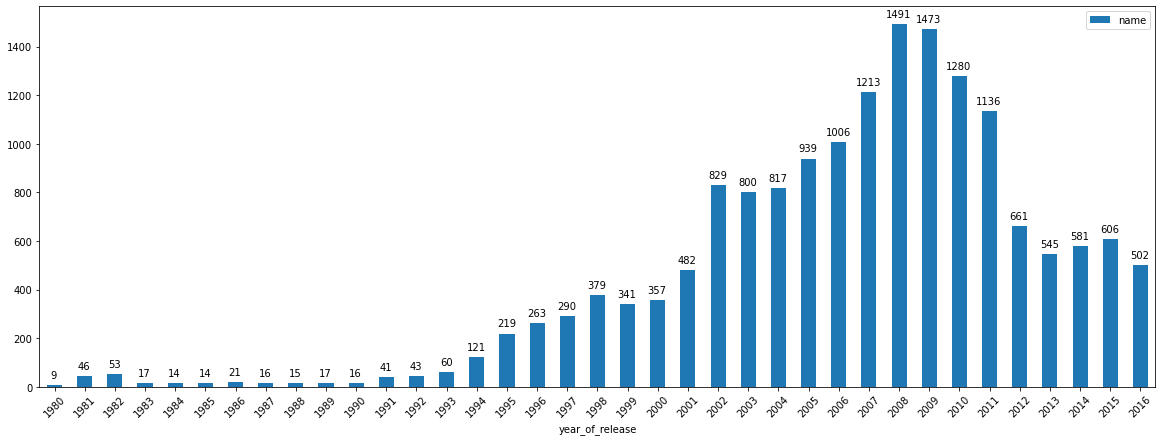

In [229]:
ax = df_per_year.plot(kind='bar', x = 'year_of_release', y = 'name', figsize=(20, 7))
plt.xticks(rotation = 45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()) ,\
               ha='center', va='center',
                                      xytext = (7, 10), textcoords = 'offset points',
                                      size=10)
plt.show()    

Melihat grafik di atas, sepertinya setiap tahun pengembangan game semakin meningkat dan mencapai puncaknya di tahun 2008 dan 2009. Namun, setelah tahun 2009, terjadi penurunan setiap tahunnya hingga 2016. Mungkin saja beberapa platform berhenti mengembangkan game baru atau membatasi pengembangannya, sehingga game yang dirilis sejak tahun 2010 ke atas mengalami penurunan dan turun sangat signifikan di tahun 2012, dan setelah itu baru pengembangannya kembali stabil.

### Distribusi Total Penjualan Berdasarkan Data per Tahun dan Popularitas Game

In [230]:
top_sales = df.groupby(['platform'])['total_sales'].sum().sort_values().reset_index().round(2)
top_sales

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


In [231]:
lifetime = df.pivot_table(values = 'total_sales', columns = 'platform', index = 'year_of_release', aggfunc = 'sum').fillna(0).astype('int')
lifetime.head()

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1981,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1982,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1983,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='platform', ylabel='year_of_release'>

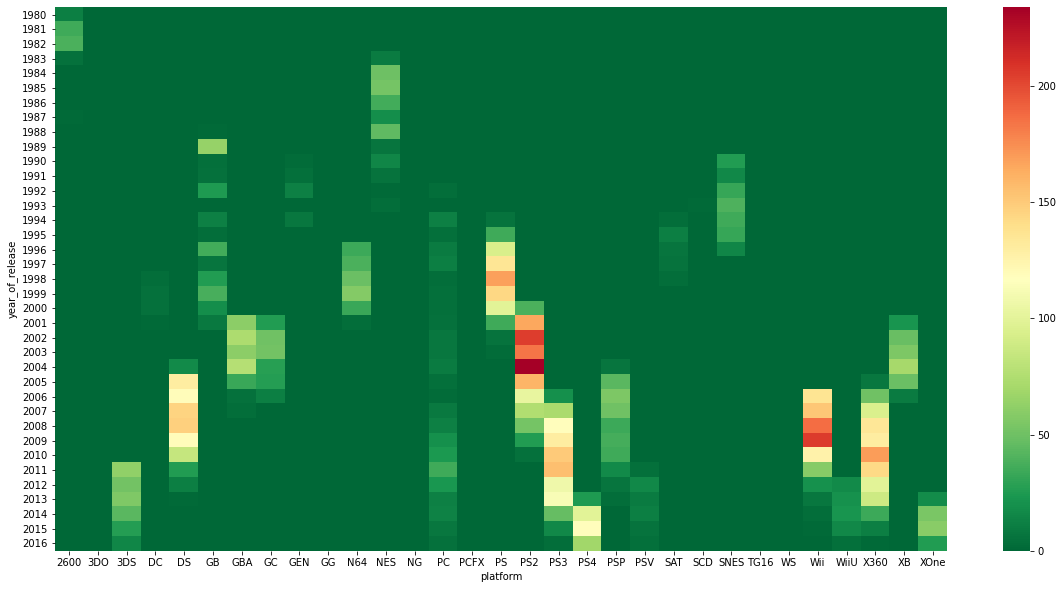

In [232]:
plt.figure(figsize = (20,10))
sns.heatmap(data = lifetime, cmap='RdYlGn_r', xticklabels=lifetime.columns.values, yticklabels=lifetime.index.values)

Melalui grafik dan tabel di atas, sepertinya umur sebuah platform biasanya berkisar di antara 10 tahun sejak pertama kali muncul hingga mulai menurun popularitasnya. Namun untuk platform PC, ternyata *lifetime*nya cukup panjang meskipun penjualan game.nya tidak begitu tinggi. Sedangkan untuk beberapa platform seperti PS2 dan Wii, mereka memiliki penjualan yang tinggi, namun umur popularitasnya tetap tidak lebih dari 10 tahun. Hal ini juga bisa dilihat pada platform DS, PS, PS3, dan X360.

Bisa dikatakan, bahwa rata - rata umur platform yang populer adalah sekitar 10 tahun, dan sebaiknya jika ingin mengembangkan game di sebuah platform adalah dalam rentang ketika platform dirilis, hingga 5 tahun mendatang.

### Periode Waktu Pengambilan Data

Berdasarkan data yang kita dapatkan sebelumnya, umur popularitas rata - rata sebuah platform adalah sekitar 10 tahun, dan biasanya mencapai popularitas tertinggi di sekitar 5 tahun pertama sejak muncul ke pasar. Jadi, jika kita mau membuat prediksi untuk tahun 2017, sebaiknya kita cukup mengambil data 5 tahun rilis terakhir saja, yaitu dari tahun 2012 hingga 2016. Untuk data dengan tahun rilis sebelum 2012 dapat kita abaikan.

In [233]:
new_df = df[df['year_of_release'] >= 2012].reset_index(drop=True)
new_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,2010.0,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,2009.0,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,2015.0,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,2012.0,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,2010.0,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2013.0,0.01
2891,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2013.0,0.01
2892,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2010.0,0.01
2893,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2013.0,0.01


Dataset baru memiliki 2895 baris dan 13 kolom. Kita akan menggunakan dataset baru ini untuk menganalisis data selanjutnya.

### Penjualan yang Berpotensi Memberikan Keuntungan

In [234]:
new_top_sales = new_df.groupby(['platform'])['total_sales'].sum().sort_values().reset_index().round(2)

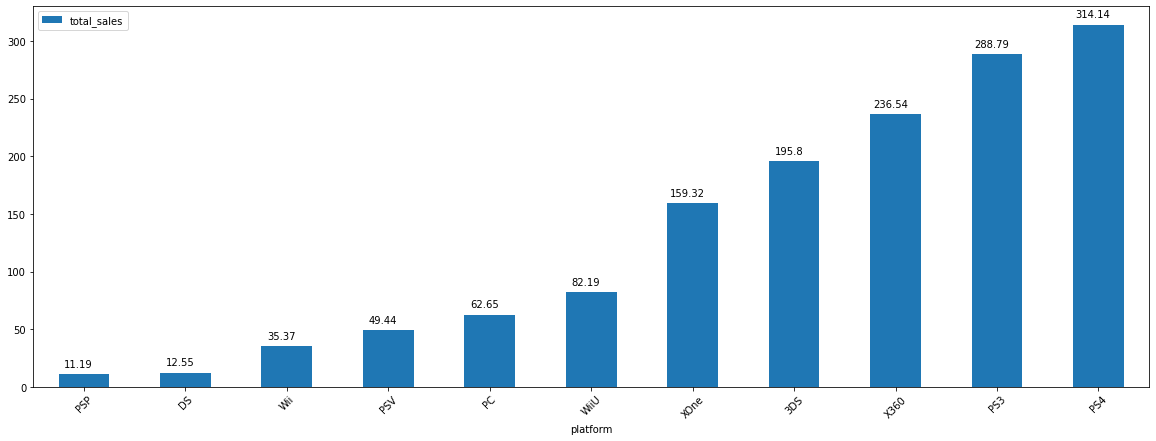

In [235]:
bx = new_top_sales.plot(kind='bar', x = 'platform', y = 'total_sales', figsize=(20, 7))
plt.xticks(rotation = 45)

for p in bx.patches:
    bx.annotate(str(p.get_height()), (p.get_x(), p.get_height()) ,\
               ha='center', va='center',
                                      xytext = (20, 10), textcoords = 'offset points',
                                      size=10)
plt.show()    

Setelah kita membuat grafik penjualan dari dataset yang baru, dimana hanya berisi data dari tahun rilis 2012 hingga 2016, ternyata penjualan tertinggi adalah platform PS4, kemudian diikuti dengan PS3 dan X360. Hal ini cukup menarik, karena PS3 dan X360 pertama kali dirilis sekitar tahun 2005 - 2006, namun hingga tahun 2016, dimana sudah 'berumur' 10 tahun, penjualannya termasuk yang tertinggi.

Xone dan 3DS yang baru dirilis sekitar tahun 2011 - 2013 juga memiliki penjualan yang cukup tinggi walaupun masih kalah dibandingkan PS3 dan X360. Hal ini mungkin terjadi karena masing - masing platform tersebut masih berumur pendek (sekitar 3-5 tahun), sehingga mungkin belum banyak pengembangan game pada platform ini, dan popularitasnya belum mencapai puncaknya.

Jika hanya melihat dari angka penjualan, maka platform yang berpotensi untuk memberi keuntungan adalah 5 platform dengan penjualan tertinggi, yaitu PS4, PS3, X360, 3DS dan XOne.
Namun jika kita juga mempertimbangkan umur popularitas sebuah platform, yang paling berpotensi tentu saja adalah PS4, karena platform ini belum lama dirilis dan masih berpotensi untuk menaikkan angka penjualan gamenya hingga beberapa tahun ke depan.

### Penjualan Global Game Berdasarkan Platform

In [236]:
agg_sales = new_df.groupby('platform')['total_sales'].agg(['sum', 'mean', 'median', 'std', 'var'])
agg_sales

,sum,mean,median,std,var
platform,,,,,
3DS,195.80,0.484653,0.11,1.374274,1.888630
DS,12.55,0.404839,0.05,1.439245,2.071426
PC,62.65,0.250600,0.08,0.494640,0.244669
PS3,288.79,0.585781,0.20,1.462855,2.139946
PS4,314.14,0.801378,0.20,1.609456,2.590350
PSP,11.19,0.064682,0.03,0.071296,0.005083
PSV,49.44,0.120000,0.05,0.202882,0.041161
Wii,35.37,0.655000,0.18,1.165447,1.358267
WiiU,82.19,0.559116,0.22,1.058836,1.121133


<AxesSubplot:xlabel='platform', ylabel='total_sales'>

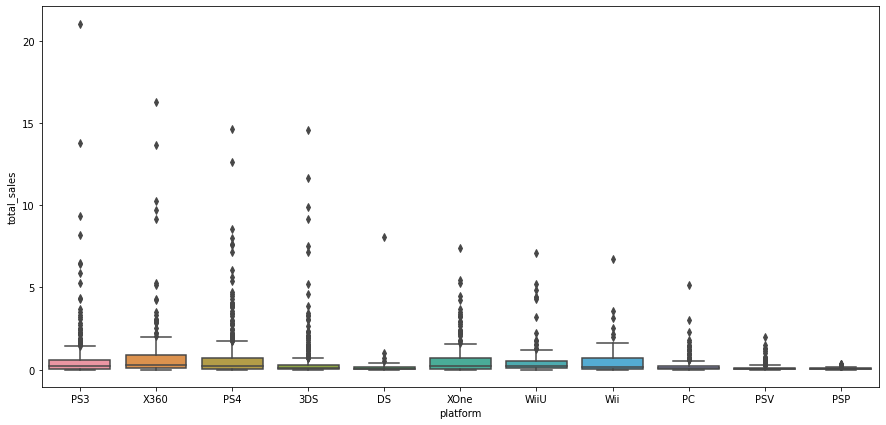

In [237]:
plt.figure(figsize = (15, 7))
sns.boxplot(data = new_df, x = 'platform', y = 'total_sales')

(0.0, 5.0)

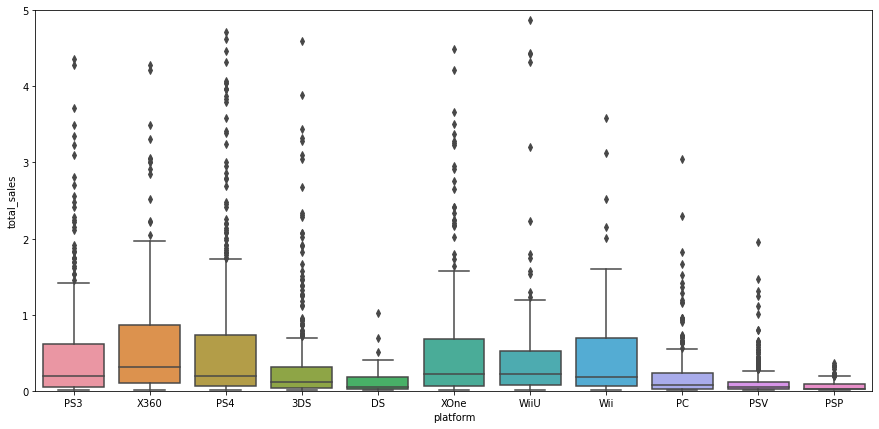

In [238]:
plt.figure(figsize = (15, 7))
sns.boxplot(data = new_df, x = 'platform', y = 'total_sales')
plt.ylim(0, 5)

Ternyata terdapat perbedaan yang sangat signifikan terhadap penjualan berbagai platform. Dari boxplot, kita dapat melihat banyak data outlier dimana artinya banyak game pada masing - masing platform yang memiliki penjualan sangat tinggi.

Jika diperhatikan, game pada platform X360, PS4, PS3, XOne dan Wii memiliki rata - rata penjualan yang jauh lebih tinggi dibandingkan platform lainnya. Hal ini terlihat wajar, dimana 3 dari 5 platform dengan rata - rata penjualan tertinggi adalah platform yang telah dirilis sejak tahun 2005 - 2006, sehingga game pada platform - platform tersebut sudah lama beredar di pasaran dan pasti jumlah pengembangan game dan jumlah penggunanya pun sudah lebih banyak.

Hal menarik yang dapat kita lihat adalah dari platform PS4 dan XOne, dimana mereka baru saja rilis di tahun 2013, namun rata - rata penjualannya cukup tinggi, mungkin meskipun baru berumur pendek, para pembuat game di platform PS4 dan XOne sudah banyak mengembangkan game untuk kedua platform ini.

### Korelasi Ulasan dengan Penjualan

Kita akan melihat bagaimana ulasan pengguna dan para profesional dapat berpengaruh terhadap penjualan pada salah satu platform populer. Data yang akan kita gunakan adalah data dari platform PS4, dimana game pada platform ini memiliki angka penjualan tertinggi hingga tahun 2016. Kita akan mencoba membuat grafik untuk mevisualisasikan korelasi antara ulasan dengan penjualan.

In [239]:
col = ['total_sales', 'critic_score', 'user_score']
review = new_df.groupby(['platform', 'name'])[col].sum().query('platform == "PS4" & critic_score > 0 & user_score > 0').reset_index()
review.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.405895,-0.033625
critic_score,0.405895,1.000000,0.557654
user_score,-0.033625,0.557654,1.000000


<AxesSubplot:title={'center':'Correlation Between Critic Score and Total Sales'}, xlabel='critic_score', ylabel='total_sales'>

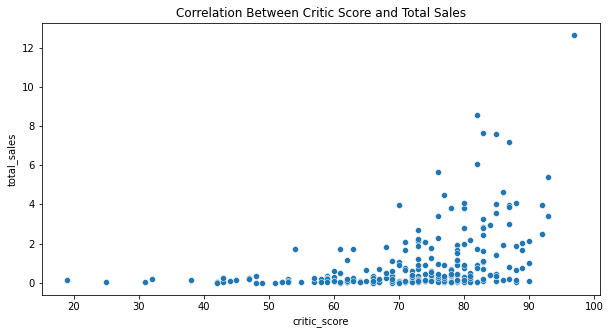

In [240]:
plt.figure(figsize = (10,5))
plt.title('Correlation Between Critic Score and Total Sales')
sns.scatterplot(data = review, x = 'critic_score', y = 'total_sales')

<AxesSubplot:title={'center':'Correlation Between User Score and Total Sales'}, xlabel='user_score', ylabel='total_sales'>

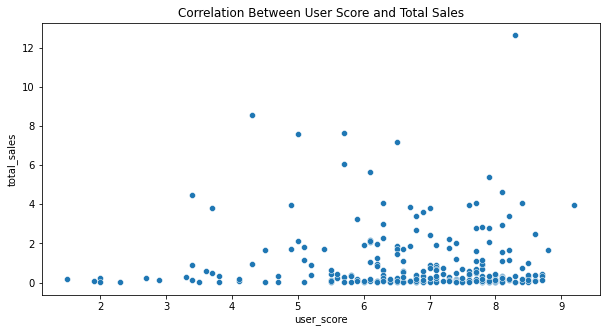

In [241]:
plt.figure(figsize = (10,5))
plt.title('Correlation Between User Score and Total Sales')
sns.scatterplot(data = review, x = 'user_score', y = 'total_sales')

Melalui grafik di atas, kita dapat melihat bahwa ulasan dari pengguna dan profesional ternyata hanya memiliki pengaruh yang kecil terhadap penjualan sebuah game di platform PS4. Hal ini juga dapat terlihat pada tabel dimana korelasi negatif yang terjadi antara ulasan pengguna dan total penjualan menandakan adanya koneksi yang sangat lemah (dengan nilai -0.03). Begitu juga dengan korelasi antara ulasan profesional dan total penjualan menunjukkan adanya koneksi yang lemah (dengan nilai 0.4).
Ini berarti semakin banyak ulasan pada sebuah game, tidak membuat penjualannya menjadi ikut meningkat.

Sehingga, dapat kita simpulkan bahwa total penjualan game pada sebuah platform tidak terlalu dipengaruhi oleh ulasan, terutama ulasan pengguna.

Untuk lebih mendukung kesimpulan kita, mari bandingkan platform lainnya yang sama - sama dirilis tahun 2013 seperti PS4, namun berbeda perusahaan pengembangnya, yaitu XOne.

In [242]:
other_review = new_df.groupby(['platform', 'name'])[col].sum().query('platform == "XOne" & critic_score > 0 & user_score > 0').reset_index()
other_review.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.410422,-0.094003
critic_score,0.410422,1.000000,0.472462
user_score,-0.094003,0.472462,1.000000


<AxesSubplot:title={'center':'Correlation Between Critic Score and Total Sales'}, xlabel='critic_score', ylabel='total_sales'>

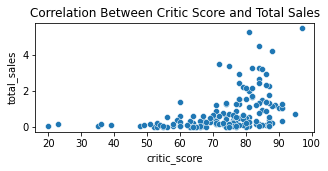

In [243]:
plt.figure(figsize = (5,2))
plt.title('Correlation Between Critic Score and Total Sales')
sns.scatterplot(data = other_review, x = 'critic_score', y = 'total_sales')

<AxesSubplot:title={'center':'Correlation Between User Score and Total Sales'}, xlabel='user_score', ylabel='total_sales'>

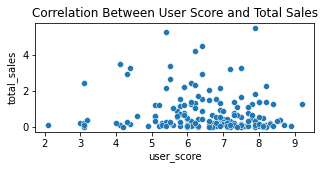

In [244]:
plt.figure(figsize = (5,2))
plt.title('Correlation Between User Score and Total Sales')
sns.scatterplot(data = other_review, x = 'user_score', y = 'total_sales')

Ternyata, hasilnya hampir sama seperti penjualan game di platform PS4. Korelasi antara ulasan pengguna dan profesional memiliki koneksi yang lemah terhadap total penjualan.

Jadi, dengan ini, kesimpulan kita bahwa sebuah ulasan hanya memiliki pengaruh yang kecil terhadap penjualan game di sebuah platform, dapat diterima.

### Distribusi Umum Game Berdasarkan Genre

Kita akan coba melihat penjualan game yang paling menguntungkan dengan mengacu pada genre game tersebut.

In [245]:
agg_genre = new_df.groupby('genre')['total_sales'].agg(['sum', 'mean', 'median', 'std', 'var'])
agg_genre

,sum,mean,median,std,var
genre,,,,,
Action,441.52,0.427829,0.120,1.165938,1.359413
Adventure,29.52,0.097426,0.030,0.207892,0.043219
Fighting,44.49,0.408165,0.130,0.910385,0.828800
Misc,85.04,0.442917,0.120,1.081047,1.168663
Platform,61.00,0.717647,0.210,1.364413,1.861623
Puzzle,4.89,0.174643,0.045,0.305438,0.093292
Racing,53.59,0.461983,0.135,0.885477,0.784070
Role-Playing,193.09,0.519059,0.140,1.312701,1.723184
Shooter,304.80,1.291525,0.435,2.248285,5.054783


(0.0, 4.0)

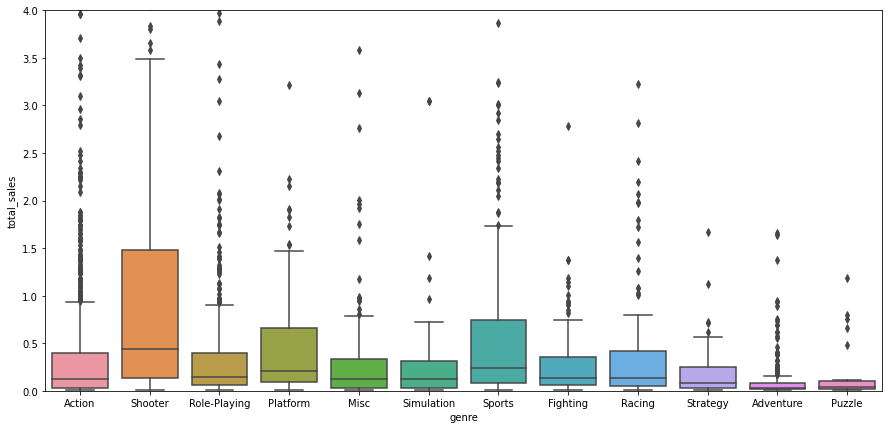

In [246]:
plt.figure(figsize = (15, 7))
sns.boxplot(data = new_df, x = 'genre', y = 'total_sales')
plt.ylim(0,4)

Melihat dari data di atas, sepertinya genre yang paling menguntungkan adalah **shooter**, karena memiliki nilai rata - rata penjualan yang lebih tinggi dibandingkan genre lainnya. Game dengan jenis **action** memang memiliki angka penjualan tertinggi, namun rata - rata penjualannya tidak sebaik genre **shooter**, bahkan berada di bawah genre lainnya. Sepertinya distribusi datanya tidak merata, mungkin game yang dijual hanya sedikit namun harganya sangat tinggi. Sedangkan genre yang paling tidak laku adalah **adventure** dan **puzzle**.

Untuk pengembangan selanjutnya, kita bisa mengembangkan game dengan genre **shooter**. Meskipun genre **shooter** memiliki total penjualan yang lebih rendah dibandingkan dengan genre **action**, namun distribusi data yang lebih variatif dapat memperlihatkan peluang yang lebih besar dalam penjualan yang tinggi di tahun mendatang.
Untuk pilihan lainnya, kita bisa juga mengembangkan genre **action**, **role-playing** dan **sports**. 

### Pemrofilan Pengguna untuk Masing-masing Wilayah

Langkah berikutnya, kita akan mencoba melihat pemrofilan pengguna untuk masing - masing wilayah berdasarkan platform, genre dan rating.

#### Platform

In [247]:
cols = ['na_sales', 'eu_sales', 'jp_sales']

top_platform = new_df.groupby('platform')[cols].sum().reset_index().round(2)
top_platform

,platform,na_sales,eu_sales,jp_sales
0,3DS,56.15,42.85,87.84
1,DS,4.59,3.53,3.72
2,PC,19.12,37.76,0.00
3,PS3,103.38,106.86,35.29
4,PS4,108.74,141.09,15.96
5,PSP,0.13,0.42,10.47
6,PSV,11.09,11.41,21.11
7,Wii,17.45,11.92,3.39
8,WiiU,38.10,25.13,13.01
9,X360,140.05,74.52,1.57


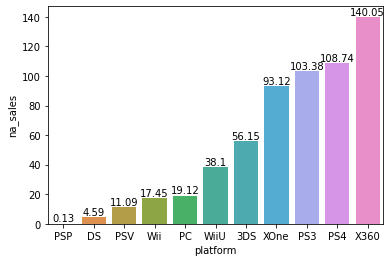

In [248]:
ax_na = sns.barplot(data = top_platform.sort_values(by='na_sales'), x = 'platform', y = 'na_sales')

for i, v in enumerate(top_platform.sort_values(by='na_sales')['na_sales']):
    ax_na.annotate(str(v), xy=(i, v), ha='center', va='bottom')

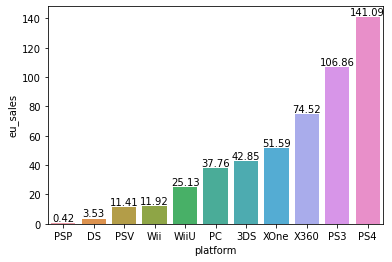

In [249]:
ax_eu = sns.barplot(data = top_platform.sort_values(by='eu_sales'), x = 'platform', y = 'eu_sales')

for i, v in enumerate(top_platform.sort_values(by='eu_sales')['eu_sales']):
    ax_eu.annotate(str(v), xy=(i, v), ha='center', va='bottom')

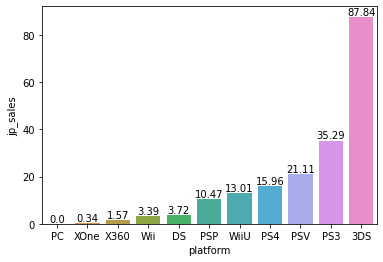

In [250]:
ax_jp = sns.barplot(data = top_platform.sort_values(by='jp_sales'), x = 'platform', y = 'jp_sales')

for i, v in enumerate(top_platform.sort_values(by='jp_sales')['jp_sales']):
    ax_jp.annotate(str(v), xy=(i, v), ha='center', va='bottom')

Ternyata, ketiga wilayah memiliki 5 platform teratas yang berbeda - beda.

- Untuk wilayah NA, 5 platform teratas adalah : X360, PS4, PS3, XOne, dan 3DS.
- Untuk wilayah EU, 5 platform teratas adalah : PS4, PS3, X360, XOne, dan 3DS.
- Untuk wilayah JP, 5 platform teratas adalah : 3DS, PS3, PSV, PS4, dan WiiU.

Platform 3DS, PS3 dan PS4 merupakan platform yang cukup populer untuk wilayah NA, EU dan JP.

Jika kita ingin mengembangkan game baru di tahun mendatang, untuk wilayah NA, sebaiknya mengembangkan game pada platform X360 dan PS4. Sedangkan untuk wilayah EU, kita bisa mengembangkan game untuk platform PS3 dan PS4. Untuk wilayah JP, sebaiknya mengembangkan game untuk platform 3DS.

#### Genre

In [251]:
top_genre = new_df.groupby('genre')[cols].sum().reset_index().round(2)
top_genre

,genre,na_sales,eu_sales,jp_sales
0,Action,178.02,159.53,52.80
1,Adventure,9.00,9.46,8.24
2,Fighting,19.79,10.79,9.44
3,Misc,38.19,26.32,12.86
4,Platform,25.38,21.41,8.63
5,Puzzle,1.13,1.40,2.14
6,Racing,17.30,27.29,2.50
7,Role-Playing,64.11,48.58,65.54
8,Shooter,144.81,113.49,9.23
9,Simulation,8.43,14.55,10.41


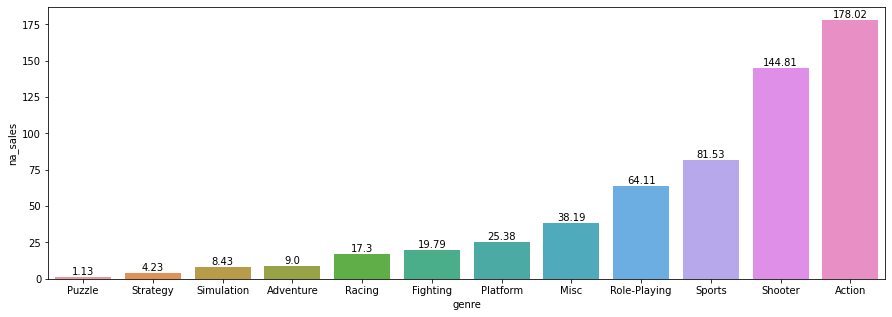

In [252]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(wspace=35)
bx_na = sns.barplot(data = top_genre.sort_values(by='na_sales'), x = 'genre', y = 'na_sales')
for i, v in enumerate(top_genre.sort_values(by='na_sales')['na_sales']):
    bx_na.annotate(str(v), xy=(i, v), ha='center', va='bottom')

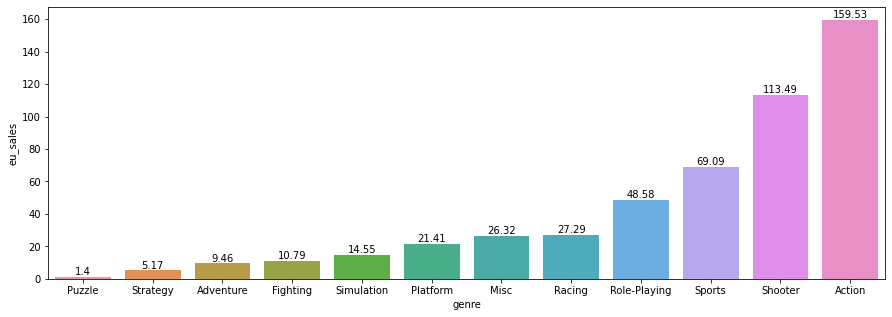

In [253]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(wspace=35)
bx_eu = sns.barplot(data = top_genre.sort_values(by='eu_sales'), x = 'genre', y = 'eu_sales')
for i, v in enumerate(top_genre.sort_values(by='eu_sales')['eu_sales']):
    bx_eu.annotate(str(v), xy=(i, v), ha='center', va='bottom')

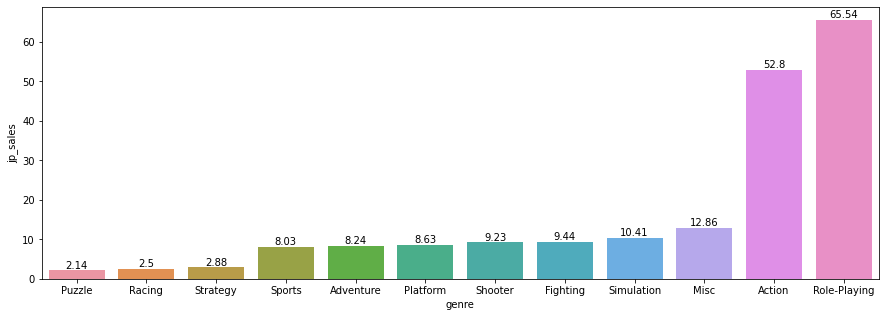

In [254]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(wspace=35)
bx_jp = sns.barplot(data = top_genre.sort_values(by='jp_sales'), x = 'genre', y = 'jp_sales')
for i, v in enumerate(top_genre.sort_values(by='jp_sales')['jp_sales']):
    bx_jp.annotate(str(v), xy=(i, v), ha='center', va='bottom')

- Untuk wilayah NA, 5 genre teratas adalah : **Action**, **Shooter**, **Sports**, **Role-Playing**, dan **Misc**
- Untuk wilayah EU, 5 genre teratas adalah : **Action**, **Shooter**, **Sports**, **Role-Playing**, dan **Racing**
- Untuk wilayah JP, 5 genre teratas adalah : **Role-Playing**, **Action**, **Misc**, **Simulation**, dan **Fighting**


Genre yang paling populer di wilayah NA dan EU ternyata hampir sama, empat ranking teratas ditempati oleh game dengan genre **Action**, **Shooter**, **Sports** dan **Role-Playing**. Perbedaannya hanyalah di NA, genre **Misc** lebih populer dibandingkan **Racing**, sedangkan di wilayah EU terjadi sebaliknya.

Untuk wilayah JP, justru genre **Role-Playing** adalah genre game yang paling populer, dibandingkan genre lainnya.

Game dengan genre **Action** dan **Role-Playing** merupakan game yang populer di wilayah NA, EU, dan JP.
Jadi, kita bisa mengembangkan kedua genre game tersebut untuk ketiga wilayah NA, EU, dan JP.

#### Rating

In [255]:
new_df['rating'].value_counts()

M       498
T       414
E       397
E10+    308
Name: rating, dtype: int64

Disini kita memiliki 4 tipe rating ESRB, yaitu:

- M adalah Mature 17+, yaitu game untuk yang berusia 17 tahun keatas.
- T adalah Teen, yaitu game untuk remaja yang berusia 13 tahun keatas.
- E adalah Everyone, yaitu game untuk semua umur.
- E10+ adalah Everyone 10+, yaitu game untuk anak - anak yang berumur 10 tahun keatas.

In [256]:
rating_sales = new_df.groupby('rating')[cols].sum().reset_index().round(2)
rating_sales

,rating,na_sales,eu_sales,jp_sales
0,E,114.49,113.05,28.33
1,E10+,75.96,55.56,8.19
2,M,231.57,193.96,21.20
3,T,66.31,53.01,26.09


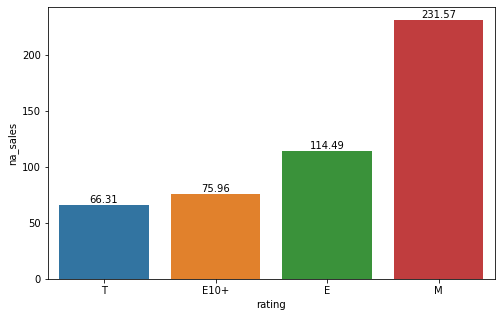

In [257]:
plt.figure(figsize = (8,5))
ax_rate_na = sns.barplot(data = rating_sales.sort_values(by='na_sales'), x = 'rating', y = 'na_sales')
for i, v in enumerate(rating_sales.sort_values(by='na_sales')['na_sales']):
    ax_rate_na.annotate(str(v), xy=(i, v), ha='center', va='bottom')

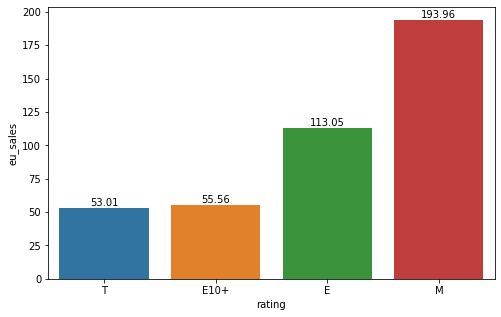

In [258]:
plt.figure(figsize = (8,5))
ax_rate_eu = sns.barplot(data = rating_sales.sort_values(by='eu_sales'), x = 'rating', y = 'eu_sales')
for i, v in enumerate(rating_sales.sort_values(by='eu_sales')['eu_sales']):
    ax_rate_eu.annotate(str(v), xy=(i, v), ha='center', va='bottom')

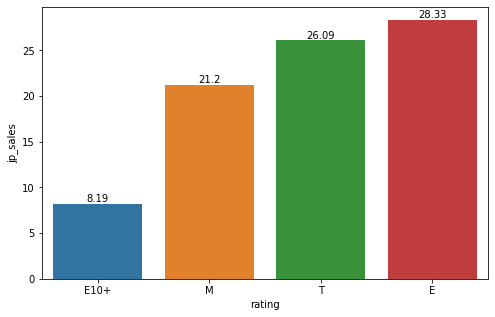

In [259]:
plt.figure(figsize = (8,5))
ax_rate_jp = sns.barplot(data = rating_sales.sort_values(by='jp_sales'), x = 'rating', y = 'jp_sales')
for i, v in enumerate(rating_sales.sort_values(by='jp_sales')['jp_sales']):
    ax_rate_jp.annotate(str(v), xy=(i, v), ha='center', va='bottom')

Ternyata untuk wilayah NA dan EU, penjualan game dengan rating M atau *mature* menempati posisi tertinggi. Sedangkan untuk wilayah JP, didominasi oleh rating E atau *everyone*.

Sehingga dapat dikatakan rating sebuah game cukup mempengaruhi penjualan game tersebut di suatu wilayah, karena masing - masing wilayah memiliki penjualan game tertinggi dengan rating yang berbeda.

Untuk tahun depan, pengembangan game di wilayah NA dan EU, bisa kita fokuskan game - game dengan rating M, dan untuk wilayah JP, lebih baik kita fokuskan game dengan rating E dan T.

### Kesimpulan dan Langkah Selanjutnya

Setelah kita mencoba menganalisa datanya, maka didapatkan kesimpulan, yaitu:

1. Melalui grafik visualisasi mengenai penjualan game per tahun, kita dapat melihat setiap tahun pengembangan game semakin meningkat dan mencapai puncaknya di tahun 2008 dan 2009. Namun, game yang dirilis setelah tahun 2009 mengalami penurunan dan turun sangat signifikan di tahun 2012, dan setelah itu baru pengembangannya kembali stabil (tidak ada kenaikan atau penurunan drastis) hingga tahun 2016.

2. Bisa dikatakan, bahwa rata - rata umur platform yang populer adalah sekitar 10 tahun sejak pertama kali muncul hingga mulai menurun popularitasnya, dan sebaiknya jika ingin mengembangkan game di sebuah platform adalah dalam rentang ketika platform dirilis, hingga 5 tahun mendatang. Hal ini dapat disimpulkan setelah melihat grafik visualisasi mengenai ditribusi total penjualan berdasarkan data per tahun dan popularitasnya.

3. Dari kesimpulan sebelumnya, kita menentukan bahwa waktu pengambilan data yang relevan adalah data dari tahun 2012 hingga tahun 2016. Data dengan tahun sebelum 2012 tidak akan kita gunakan.

4. Melihat dari penjualan game pada platform dari tahun 2012 hingga 2016, didapatkan kesimpulan bahwa untuk pengembangan selanjutnya, yang paling berpotensi menguntungkan adalah game untuk platform PS4. Karena mempertimbangkan rata - rata penjualan sebelumnya dan juga umur popularitas sebuah platform, PS4 belum lama dirilis dan masih berpotensi untuk menaikkan angka penjualan gamenya hingga beberapa tahun ke depan.

5. Kita juga mencoba melihat korelasi antara ulasan pengguna dan profesional dengan penjualan sebuah game di platform populer, yaitu PS4. Didapatkan hasil bahwa korelasi antara keduanya merupakan korelasi yang lemah. Sehingga, dapat disimpulkan bahwa ulasan memiliki pengaruh yang sangat kecil terhadap total penjualan. Untuk mendukung pernyataan ini, kita juga mencoba melihat korelasi yang sama namun pada platform yang berbeda, yaitu XOne. Platform ini dipilih karena sama - sama rilis di tahun 2013 dan memiliki perusahaan pengembang yang berbeda. Hasilnya tetap sama, yaitu korelasi yang lemah antara ulasan dengan total penjualan.

6. Selain dari total penjualan pada platform, kita juga mencoba melihat distribusi penjualan game berdasarkan genre. Hasilnya didapatkan kesimpulan bahwa genre yang berpotensi untuk dikembangkan adalah genre **Shooter**. Untuk genre **Action** juga memiliki potensi yang cukup tinggi, karena angka penjualannya tertinggi, namun sepertinya jumlah gamenya masih tidak terlalu banyak dan jumlah penggunanya belum sebanyak pengguna game genre **Shooter**.

7. Kita mencoba melihat profil pengguna game berdasarkan platform, genre, dan rating untuk masing - masing wilayah NA, EU dan JP. Dari penelitian ini kita mendapatkan kesimpulan:
    * Untuk wilayah NA:
        * 5 platform teratas adalah : X360, PS4, PS3, XOne, dan 3DS.
        * 5 genre teratas adalah : **Action**, **Shooter**, **Sports**, **Role-Playing**, dan **Misc**
        * rating tertinggi adalah M (*mature*)
    * Untuk wilayah EU:
        * 5 platform teratas adalah : PS4, PS3, X360, XOne, dan 3DS.
        * 5 genre teratas adalah : **Action**, **Shooter**, **Sports**, **Role-Playing**, dan **Racing**
        * rating tertinggi adalah M (*mature)
    * Untuk wilayah JP:
        * 5 platform teratas adalah : 3DS, PS3, PSV, PS4, dan WiiU.
        * 5 genre teratas adalah : **Role-Playing**, **Action**, **Misc**, **Simulation**, dan **Fighting**
        * rating tertinggi adalah E (*everyone*)
        
Dengan melihat kesimpulan dari langkah - langkah yang sudah kita lakukan di atas, jika kita ingin mengembangkan game baru di tahun mendatang, maka:

* Untuk wilayah NA, sebaiknya mengembangkan game pada platform X360 dan PS4 dengan genre **Action** dan **Shooter**.
* Untuk wilayah EU, kita bisa mengembangkan game untuk platform PS3 dan PS4 dengan genre **Action** dan **Shooter**.
* Untuk wilayah JP, sebaiknya mengembangkan game untuk platform 3DS dengan genre **Role-Playing**.

## Menguji Hipotesis

Kita telah mencoba mempelajari profil pengguna game di masing - masing wilayah NA, EU, dan JP, dengan mengacu pada 5 platform teratas, 5 genre teratas dan rating di masing - masing wilayah tersebut.

Selanjutnya, kita akan menguji hipotesis kita di awal, yaitu:

1. Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
2. Rata-rata rating pengguna genre Action dan Sports berbeda.

**Menguji Hipotesis Pertama**

Untuk hipotesis pertama, kita akan mencoba melakukan *ttest_ind(sample_1, sample_2)* dari paket modul *scipy.stats* dan bandingkan hasil nilai p dengan "alpha".
Nilai "alpha" atau tingkat signifikansi yang dipilih adalah sebesar 5%. Angka ini dipilih karena mempertimbangkan tujuan pengujian hipotesis dan juga konteks pengujian yaitu untuk keperluan industri game yang tidak memerlukan tingkat signifikansi yang sangat rendah (seperti 0.001 atau bahkan 0.0001).
Kita akan mengasumsikan bahwa terdapat kemungkinan sebesar 5% kesalahan dalam menolak H0.

H0 : rata - rata rating pengguna platform Xbox One dan PC adalah sama.

H1 : rata - rata rating pengguna platform Xbox One dan PC adalah berbeda. 

In [260]:
df_xone = new_df.loc[new_df['platform'] == 'XOne']
df_pc = new_df.loc[new_df['platform'] == 'PC']

In [261]:
sample_1 = df_xone.dropna()['user_score']
sample_2 = df_pc.dropna()['user_score']

In [262]:
sample_1.mean()

6.49308176100629

In [263]:
sample_2.mean()

6.358045977011493

In [264]:
alpha = 0.05
result = st.ttest_ind(sample_1, sample_2, equal_var=False)
result.pvalue

0.41668656393474524

In [265]:
if (result.pvalue < alpha):
    print('Tolak null hipotesis')
else:
    print('Kita gagal menolak null hipotesis')

Kita gagal menolak null hipotesis


Setelah melakukan ttest_ind, hasil uji statistik menunjukkan bahwa p-value > alpha, dan hasil uji hipotesis menyatakan "Kita gagal menolak null hipotesis," maka kita dapat menyimpulkan bahwa bukti yang ada tidak cukup kuat untuk menolak hipotesis nol (H0) pada tingkat signifikansi yang telah ditentukan (nilai alpha = 0.05).

Sehingga bisa dikatakan bahwa tidak ada perbedaan antara rata - rata rating pengguna platform Xbox One dan PC.

Maka dari itu, hipotesis pertama kita yang menyatakan bahwa rata - rata rating pengguna platform Xbox One dan PC adalah sama dapat diterima sepenuhnya.

**Menguji Hipotesis Kedua**

Untuk hipotesis kedua, kita masih akan menggunakan *ttest_ind(sample_1, sample_2)* dari paket modul *scipy.stats* dan bandingkan hasil nilai p dengan "alpha".
Nilai "alpha" yang akan kita gunakan sama seperti pada pengujian hipotesis pertama, yaitu 5%.

H0 : Rata-rata rating pengguna genre **Action** dan **Sports** sama.

H1 : Rata-rata rating pengguna genre **Action** dan **Sports** berbeda.

In [266]:
df_action = new_df.loc[new_df['genre'] == 'Action']
df_sports = new_df.loc[new_df['genre'] == 'Sports']

In [267]:
df_action

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,2010.0,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,2009.0,16.27
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,2015.0,12.62
15,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,2010.0,8.17
27,Assassin's Creed III,PS3,2012,Action,2.64,2.52,0.16,1.12,85.0,6.9,M,2010.0,6.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,Kyoukai no Shirayuki,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2013.0,0.01
2887,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2010.0,0.01
2888,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,2009.0,0.01
2889,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2013.0,0.01


In [268]:
sample_3 = df_action.dropna()['user_score']
sample_4 = df_sports.dropna()['user_score']

In [269]:
sample_3.mean()

6.873995271867613

In [270]:
sample_4.mean()

5.8161764705882355

In [271]:
alpha = 0.05
result = st.ttest_ind(sample_3, sample_4, equal_var=False)
result.pvalue

4.880249484559985e-13

In [272]:
if (result.pvalue < alpha):
    print('Tolak null hipotesis')
else:
    print('Kita gagal menolak null hipotesis')

Tolak null hipotesis


Setelah melakukan ttest_ind, hasil uji statistik menunjukkan bahwa p-value < alpha, dan hasil uji hipotesis menyatakan "Tolak null hipotesis," maka kita dapat menyimpulkan bahwa ada bukti yang cukup kuat untuk menolak hipotesis nol (H0) dan menerima hipotesis alternatif (H1) pada tingkat signifikansi yang telah ditentukan (nilai alpha = 0.05).

Sehingga bisa dikatakan bahwa ada perbedaan antara rata-rata rating pengguna genre **Action** dan **Sports**.

Maka dari itu, hipotesis kedua kita yang menyatakan bahwa rata-rata rating pengguna genre Action dan Sports berbeda dapat diterima sepenuhnya.

## Kesimpulan Umum

Kita telah mencoba untuk mengolah data dan membuktikan hipotesis kita dapat diterima atau tidak.

Kumpulan data awal yang kita miliki terkait ulasan pengguna dan ahli game, genre, platform (misalnya Xbox atau PlayStation), dan data historis penjualan game selama tahun 2016 disimpan dalam *file* berikut: `/datasets/games.csv`.

Dari tahap pra-pemrosesan data terhadap masing - masing tabel, kita mendapat kesimpulan, bahwa:

1. Gaya penulisan judul kolom pada dataset kita yang semula tidak mengikuti aturan, sudah diperbaiki sesuai dengan aturan gaya penulisan yang baik, yaitu: **Semua karakter harus menggunakan huruf kecil**.

2. Kolom `name` memiliki nilai yang hilang dan sudah diperbaiki dengan menghapus datanya. Langkah ini diambil dengan mempertimbangkan persentase data yg hilang tersebut sangat kecil (0.01%) dan karena diasumsikan data tidak memiliki informasi yang lengkap.

3. Kolom `genre` memiliki nilai yang hilang dengan persentase yang sama dengan kolom `name`. Setelah dilakukan pemeriksaan, nilai yang hilang pada kedua kolom ini simetris. Sehingga ketika data dengan nilai yang hilang pada kolom `name` dihapus, secara otomatis data pada kolom `genre` juga tereliminasi.

4. Kolom `year_of_release` memiliki 2 masalah, yaitu adanya nilai yang hilang dan kesalahan pada tipe datanya. Data dengan nilai yang hilang telah diisi dengan median berdasarkan pengelompokkan dengan kolom `platform`, dengan asumsi bahwa game pada platform yang sama, mungkin memiliki tahun rilis yang hampir sama. Tipe datanya yang semula berupa *float* telah diperbaiki menjadi *integer*.

5. Kolom `critic_score`, `user_score`, dan `rating` masing - masing memiliki nilai yang hilang dengan persentase yang sangat besar (antara 40% hingga 50%). Karena jumlah data yang hilang tersebut sangat banyak, dan kita tidak bisa mengisinya dengan sembarangan, karena dapat mempengaruhi distribusi datanya dan analisis data kita menjadi tidak akurat, maka, diputuskan untuk tidak mengisi nilai yang hilang tersebut dan membiarkan datanya apa adanya saja.

6. Tipe data pada kolom `user_score` awalnya berupa *object*. Setelah diteliti, kemungkinan munculnya tipe data ini adalah karena terdapat nilai 'tbd' pada kolom tersebut. Maka, kita telah mengganti nilai 'tbd' dengan NaN, karena diasumsikan game dengan penilaian 'tbd' merupakan game yang tidak populer dan dapat diabaikan. Setelah mengubah nilai 'tbd', baru kita ubah tipe datanya menjadi *float*.

7. Tidak ada data yang terduplikasi.

8. Setelah memperbaiki masalah - masalah yang ada dan melakukan penambahan 2 kolom yaitu `median_year_of_release` dan `total_sales`, maka dataset kita saat ini memiliki 16713 baris dan 13 kolom.

Setelah selesai memperbaiki data yang bermasalah, kita mencoba menganalisa data dengan melakukan beberapa langkah, yaitu:

1. Mempelajari distribusi penjualan game per tahun dan popularitasnya sebagai acuan untuk menentukan periode waktu pengambilan data yang lebih relevan.

2. Setelah melakukan langkah pertama, didapatkan kesimpulan bahwa data yang relevan adalah data dengan tahun rilis 2012 hingga 2016, karena rata - rata umur popularitas sebuah platform adalah 5 - 10 tahun, dan melihat grafik data penjualan, tahun 2012 - 2016 terlihat lebih stabil dibandingkan tahun - tahun sebelumnya.

3. Melihat dari penjualan game pada platform dari tahun 2012 hingga 2016, didapatkan kesimpulan bahwa untuk pengembangan selanjutnya, yang paling berpotensi menguntungkan adalah game untuk platform PS4. Karena mempertimbangkan rata - rata penjualan sebelumnya dan juga umur popularitas sebuah platform, PS4 belum lama dirilis dan masih berpotensi untuk menaikkan angka penjualan gamenya hingga beberapa tahun ke depan.

4. Kita juga mencoba melihat korelasi antara ulasan pengguna dan profesional dengan penjualan sebuah game di platform populer, yaitu PS4. Didapatkan hasil bahwa korelasi antara keduanya merupakan korelasi yang lemah. Sehingga, dapat disimpulkan bahwa ulasan memiliki pengaruh yang sangat kecil terhadap total penjualan. Untuk mendukung pernyataan ini, kita juga mencoba melihat korelasi yang sama namun pada platform yang berbeda, yaitu XOne. Platform ini dipilih karena sama - sama rilis di tahun 2013 dan memiliki perusahaan pengembang yang berbeda. Hasilnya tetap sama, yaitu korelasi yang lemah antara ulasan dengan total penjualan.

5. Selain dari total penjualan pada platform, kita juga mencoba melihat distribusi penjualan game berdasarkan genre. Hasilnya didapatkan kesimpulan bahwa genre yang berpotensi untuk dikembangkan adalah genre **Shooter**. Untuk genre **Action** juga memiliki potensi yang cukup tinggi, karena angka penjualannya tertinggi, namun sepertinya jumlah gamenya masih tidak terlalu banyak dan jumlah penggunanya belum sebanyak pengguna game genre **Shooter**.

6. Kita mencoba melihat profil pengguna game berdasarkan platform, genre, dan rating untuk masing - masing wilayah NA, EU dan JP. Dari penelitian ini kita mendapatkan kesimpulan:
    * Untuk wilayah NA:
        * 5 platform teratas adalah : X360, PS4, PS3, XOne, dan 3DS.
        * 5 genre teratas adalah : **Action**, **Shooter**, **Sports**, **Role-Playing**, dan **Misc**
        * rating tertinggi adalah M (*mature*)
    * Untuk wilayah EU:
        * 5 platform teratas adalah : PS4, PS3, X360, XOne, dan 3DS.
        * 5 genre teratas adalah : **Action**, **Shooter**, **Sports**, **Role-Playing**, dan **Racing**
        * rating tertinggi adalah M (*mature)
    * Untuk wilayah JP:
        * 5 platform teratas adalah : 3DS, PS3, PSV, PS4, dan WiiU.
        * 5 genre teratas adalah : **Role-Playing**, **Action**, **Misc**, **Simulation**, dan **Fighting**
        * rating tertinggi adalah E (*everyone*)
        
Dengan melihat kesimpulan dari langkah - langkah yang sudah kita lakukan di atas, jika kita ingin mengembangkan game baru di tahun mendatang, maka:

* Untuk wilayah NA, sebaiknya mengembangkan game pada platform X360 dan PS4 dengan genre **Action** dan **Shooter**.
* Untuk wilayah EU, kita bisa mengembangkan game untuk platform PS3 dan PS4 dengan genre **Action** dan **Shooter**.
* Untuk wilayah JP, sebaiknya mengembangkan game untuk platform 3DS dengan genre **Role-Playing**.

Pada awal proyek, kita telah merumuskan hipotesis sebagai berikut:

1. Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
2. Rata-rata rating pengguna genre Action dan Sports berbeda.

Setelah menganalisis data dan melakukan uji hipotesis statistik dengan merumuskan hipotesis nol dan alternatif dan melakukan pengujian t-test, kita mendapatkan kesimpulan bahwa:

1. Rata-rata rating pengguna platform Xbox One dan PC adalah sama.

Hipotesis ini dapat diterima, karena tidak ada perbedaan yang signifikan antara rata - rata rating pengguna platform Xbox One dan PC. 

2. Rata-rata rating pengguna genre Action dan Sports berbeda.

Hipotesis ini dapat diterima sepenuhnya, karena ada perbedaan antara rata-rata rating pengguna genre **Action** dan **Sports**

Dengan demikian, kita sudah menguji hipotesis kita dan menarik kesimpulan. Kita dapat menentukan game yang berpotensial dengan mempelajari penjualan game berdasarkan platform dan genre yang populer dalam kurun waktu 5 tahun sejak game atau platform dirilis. Untuk tahun 2017, kita dapat mengembangkan game atau mempromosikan game dengan genre **Shooter** dan **Action** pada platform PS4 untuk wilayah NA dan EU, sedangkan untuk wilayah JP, kita bisa fokuskan pengembangan dan promosi game dengan genre **Role-Playing** pada platform 3DS.
